## 10.3 모델 성능 평가 지표

### 10.3.1 분류 모델 평가: 오차행렬과 연관 지표

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
# help(train_test_split)

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [4]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [5]:
print('{} train score: {:.3f}'.format(model.__class__.__name__, model.score(X_train,y_train))) 
print('{} test score: {:.3f}'.format(model.__class__.__name__ , model.score(X_test,y_test)))

SVC train score: 0.920
SVC test score: 0.923


In [6]:
y_pred = model.predict(X_test)

In [7]:
m = confusion_matrix(y_test, y_pred)

In [8]:
print('Confution matrix:\n{}'.format(m))

Confution matrix:
[[45  8]
 [ 3 87]]


In [9]:
accuracy = (m[0,0] + m[1,1]) / m.sum()
print('정확도 {:.3f}'.format(accuracy))

정확도 0.923


In [10]:
# 정밀도 계산
precision = (m[1,1])/m[:, 1].sum()
# 재현도 계산
recall = (m[1,1])/m[1, :].sum()
# F1 점수 계산
f1 = 2 * (precision * recall)/(precision + recall)
print('정밀도: {:.3f}'.format(precision)) 
print('재현도: {:.3f}'.format(recall)) 
print('F1 값: {:.3f}'.format(f1))

정밀도: 0.916
재현도: 0.967
F1 값: 0.941


In [11]:
print('정밀도:{:.3f}'.format(precision_score(y_test, y_pred))) 
print('재현도:{:.3f}'.format(recall_score(y_test, y_pred))) 
print('F1값:{:.3f}'.format(f1_score(y_test, y_pred)))

정밀도:0.916
재현도:0.967
F1값:0.941


### 10.3.2 분류 모델 평가:ROC 곡선과 AUC

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [13]:
model = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train)

In [14]:
results = pd.DataFrame(model.predict_proba(X_test), columns=cancer.target_names)

In [15]:
results.head()

,malignant,benign
0,0.003700,0.996300
1,0.000523,0.999477
2,0.028101,0.971899
3,0.007092,0.992908
4,0.003170,0.996830


In [16]:
for threshold in [0.4, 0.3, 0.15, 0.05]:
    results[f'flag_{threshold}'] = results['benign'].map(lambda x: 1 if x > threshold else 0)

In [17]:
results.head(10)

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.003700,0.996300,1,1,1,1
1,0.000523,0.999477,1,1,1,1
2,0.028101,0.971899,1,1,1,1
3,0.007092,0.992908,1,1,1,1
4,0.003170,0.996830,1,1,1,1
5,0.008900,0.991100,1,1,1,1
6,0.005989,0.994011,1,1,1,1
7,0.003187,0.996813,1,1,1,1
8,0.921077,0.078923,0,0,0,1
9,0.815918,0.184082,0,0,1,1


<AxesSubplot:xlabel='false positive rate', ylabel='true positive rate'>

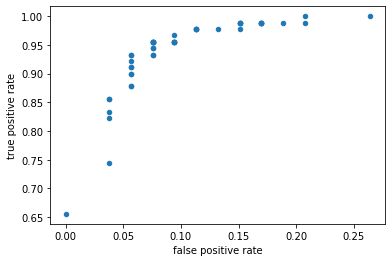

In [18]:
# 임곗값을 0.01 ~ 0.99 사이에서 50개를 만들고 위양성 비율과 진양성 비율 계산 
rates = {}
for threshold in np.linspace(0.01, 0.99, num=50):
    labels = results['benign'].map(lambda x: 1 if x > threshold else 0) 
    m = confusion_matrix(y_test, labels)
    rates[threshold] = {'false positive rate': m[0,1] / m[0, :].sum(),'true positive rate': m[1,1] / m[1, :].sum()}
# 가로축은 false positive rate, 세로축은 true positive rate로 그래프 그리기 
pd.DataFrame(rates).T.plot.scatter('false positive rate', 'true positive rate')

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.5, random_state=66)
model = SVC(kernel='linear', probability=True, random_state=0).fit(X_train, y_train)

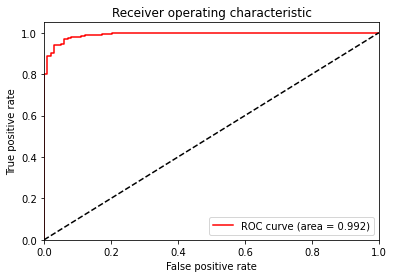

In [20]:
y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %.3f)' % auc) 
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="best")

### 10.3.3 회귀 모델 평가지표

In [21]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [22]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name="MEDV")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [23]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=0),
    'DecisionTresRegressor': DecisionTreeRegressor(random_state=0),
    'LinearSVR':LinearSVR(random_state=0)
}

In [28]:
scores = {}

for model_name, model in models.items():
    model.fit(X_train_std, y_train)
    scores[(model_name, 'MSE')] = mean_squared_error(y_test, model.predict(X_test_std))
    scores[(model_name, 'MAE')] = mean_absolute_error(y_test, model.predict(X_test_std))
    scores[(model_name, 'MedAE')] = median_absolute_error(y_test, model.predict(X_test_std))
    scores[(model_name, 'R2')] = r2_score(y_test, model.predict(X_test_std))

In [29]:
pd.Series(scores).unstack()

,MAE,MSE,MedAE,R2
DecisionTresRegressor,3.064822,24.590435,1.900000,0.675653
LinearRegression,3.627793,25.301662,2.903830,0.666272
LinearSVR,3.275385,26.799616,2.092362,0.646514
Ridge,3.618201,25.282890,2.930524,0.666520


In [27]:
import sklearn.neighbors
dir(sklearn.neighbors)

['BallTree',
 'DistanceMetric',
 'KDTree',
 'KNeighborsClassifier',
 'KNeighborsRegressor',
 'KNeighborsTransformer',
 'KernelDensity',
 'LocalOutlierFactor',
 'NearestCentroid',
 'NearestNeighbors',
 'NeighborhoodComponentsAnalysis',
 'RadiusNeighborsClassifier',
 'RadiusNeighborsRegressor',
 'RadiusNeighborsTransformer',
 'VALID_METRICS',
 'VALID_METRICS_SPARSE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_ball_tree',
 '_base',
 '_classification',
 '_dist_metrics',
 '_graph',
 '_kd_tree',
 '_kde',
 '_lof',
 '_nca',
 '_nearest_centroid',
 '_quad_tree',
 '_regression',
 '_typedefs',
 '_unsupervised',
 'kneighbors_graph',
 'radius_neighbors_graph']